In [1]:
## import data visualization library matplotlib and seaborn
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset,
                                                  zoomed_inset_axes)
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as mpatches

## import module to read files
import mimetypes
import urllib
import os

# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if __name__ == '__main__':


Mounted at /content/drive


In [2]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/My Drive/Visualization/Data/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Visualization/Images/'

In [3]:
class Bubble:
    def read_file(self, file):
      """Read different types of files and return pandas dataframe.

      This function can transform multiple file type such as csv/excel/text into
      a pandas dataframe. User need to input the filename such as: 'file.csv'.
      If the file type cannot be find or not support it, it will return the message.

      Args:
          file: filename of user data source

      Returns:
          data : A pandas dataframe 

      """
        # Get the file URL
      file_url = urllib.request.pathname2url(file)  # try catch
      # use mimetypes package to guess the file type
      # For example: 'file.csv' will return 'csv'
      ftype = mimetypes.guess_type(file_url, strict=True)[0]
        ## read data file according to its formate, default includes three types of files: csv/excel/text
        # read csv format data
      if 'csv' in ftype:
          data = pd.read_csv(path + file)
        # read excel format data
      elif 'sheet' in ftype:
          data = pd.read_excel(path + file)
        # read text format data from
      elif ftype == 'text/plain':
          data = pd.read_csv(path + file, sep="\t")
      else:
          print("File type cannot find!")
      return data


    def bubble_plot(self, file, x_col_name, y_col_name, bubble_col, x_label,
                    y_label, bubble_name, legend_title,output_name, **kwargs):
        """Bubble chart with each bubble name and sizes 

        This function will convert the user's incoming data set into DataFrame and then draw
        the Bubble Chart using Matplotlib. The bubble chart can show x, y, the size of bubbles and the names of bubbles.
        
        To use this function, you need a dataset with four variables columns. The four variables are x_col_name,
        y_col_name, bubble_col and bubble_name. The bubble_col is the column decide bubble sizes and bubble_name 
        is will show each bubble name in the legend lables.
        
        In our example, The x_col_name is life_Expectancy, The y_col_name is Birth Rate, The bubble_col is GDP and
        bubble_name is country Name. 

        Args:
            file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
            x_col_name: The X column name
            y_col_name: The Y column name
            bubble_col : The bubble values column
            x_label: x axis label
            y_label: y axis label
            bubble_name: The column of each bubble name, it will show each bubble name in legend lables
            legend title: customize legend lables title
            plot_title: The title of the plot
            output_name : output file name


        """
        conf = {
            'plotwidth':
            8,  #weight
            'plotheight':
            6,  #height
            'my_font':
            'DejaVu Sans',
            'backgrid':
            True,
            'isframe':
            True,
            'linewidth':
            2,
            'gridlinewidth':
            0.5,
            'gridline_style':
            '--',
            'gridline_color':
            'gray',
            'gridline_alpha':
            0.8,
            'labeltext_size':
            20,
            'labelpad':
            10,
            'legend_size':
            10,
            'legend_loc':
            'upper right',
            'title_pad':
            10,
            'title_size':
            15,
            'bubble_scale':
            50,
            'title_loc':
            'center',
            'xtrick_fontsize':
            15,
            'ytrick_fontsize':
            15,
            'bubble_marker':
            'o',
            'alpha':
            0.8,
            'bubble_colors': [
                "#3d405b", "#e07a5f", "#f4f1de", "#81b29a", "#f2cc8f",
                "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
                '#ECE133', '#56B4E9'
            ],
            'bubblesize_legend_loc': 'lower left',
            'bubbleszie_legend_title': 'Sizes',
            'plot_title':''
        }

        # when new configuraton is set, update the original one
        conf.update(kwargs)
        ## create figure and set figure size
        fig, ax = plt.subplots(figsize=(conf['plotwidth'], conf['plotheight']))
        ## background grid setting
        if conf['backgrid'] == True:
            ax.grid(linestyle=conf['gridline_style'],
                    linewidth=conf['gridlinewidth'],
                    color=conf['gridline_color'],
                    alpha=conf['gridline_alpha'])

        ## x, y axis setting
        # fontsize: x, y title size
        ax.set_xlabel(x_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])
        ax.set_ylabel(y_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])

        # Input the valid filename and return the pandas dataframe for drawing 
        data = self.read_file(file)

        # start plot

        # origin bubble data
        bubble_list = list(data[bubble_col])

        # scale the bubble size become smaller/bigger depend on user input, the inital setting is 50
        bubble_scale = []
        for i in range(len(bubble_list)):
            bubble_scale.append(bubble_list[i] / conf['bubble_scale'])

        # bubble colors
        # count the number of x column values and match with our bubble color list
        num_index = len(data[x_col_name])
        colors = conf['bubble_colors'][:num_index]

        # plot bubble chart
        scatter = ax.scatter(x=x_col_name,
                             y=y_col_name,
                             c=colors,
                             s=bubble_scale,
                             marker=conf['bubble_marker'],
                             alpha=conf['alpha'],
                             data=data,
                             label=colors)

        # add bubble_name into the legend 
        legend_list = list(data[bubble_name])

        # match the color of the label
        l = []
        for i in range(0, num_index):
            l.append(
                mpatches.Patch(color=colors[i],
                               alpha=conf['alpha'],
                               label=legend_list[i]))
        # legend
        legend1 = ax.legend(handles=l, title=legend_title,fontsize=conf['legend_size'])

        # add the second legend(bubble_sizes)
        ax.add_artist(legend1)

        # create the handles and labels for the bubble sizes legend
        handles, labels = scatter.legend_elements(prop="sizes",
                                                  alpha=conf['alpha'])

        # scale back the origin data into the legend labels
        kw = dict(prop="sizes", func=lambda s: s * conf['bubble_scale'])

        # bubble sizes legend add into the plot
        legend2 = ax.legend(*scatter.legend_elements(**kw),
                            loc=conf['bubblesize_legend_loc'],
                            title=conf['bubbleszie_legend_title'],
                            fontsize=conf['legend_size'])

        # xtricks and yticks font size
        plt.xticks(fontsize=conf['xtrick_fontsize'])
        plt.yticks(fontsize=conf['ytrick_fontsize'])

        # plot title
        plt.title(conf['plot_title'], fontsize=conf['title_size'])

        # save the image
        plt.savefig(path_img + output_name)
        plt.show()


    def bubble_category(self, file, x_col_name, y_col_name, bubble_col,
                        x_label, y_label, category_col, output_name, **kwargs):
      
      """Bubble chart with different category 

       This function will convert the user's incoming data set into DataFrame and then draw
       the Bubble Chart using Matplotlib. The bubble chart can show x, y, the size of bubbles and the bubble category.
       Bubble category is used for when the dataset have a column with multiple type. For example, in our example
       continent is a good category. It have Asia, Europe, Africa, Oceania and Americas. Each category will have differnt
       bubble colors and also legend for different category.

       In the example, x_col_name is life_Exp, y_col_name is population, bubble_col is gdp and the category column is 
       continent. 

       Args:
            file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
            x_col_name: The X column name
            y_col_name: The Y column name
            bubble_col : The bubble values column
            category_col: The category column of bubble
            x_label: x axis label
            y_label: y axis label
            legend title: customize legend lables title
            plot_title: The title of the plot
            output_name : output file name

      """
      conf = {
          'plotwidth':
          8,  #weight
          'plotheight':
          6,  #height
          'my_font':
          'DejaVu Sans',
          'backgrid':
          True,
          'isframe':
          True,
          'linewidth':
          2,
          'gridlinewidth':
          0.5,
          'gridline_style':
          '--',
          'gridline_color':
          'gray',
          'gridline_alpha':
          0.8,
          'labeltext_size':
          20,
          'labelpad':
          10,
          'legend_size':
          12,
          'legend_loc':
          'upper right',
          'title_pad':
          10,
          'title_size':
          15,
          'bubble_scale':
          50,
          'title_loc':
          'center',
          'xtrick_fontsize':
          15,
          'ytrick_fontsize':
          15,
          'bubble_marker':
          'o',
          'alpha':
          0.8,
          'bubble_colors': [
                "#3d405b", "#e07a5f", "#f4f1de", "#81b29a", "#f2cc8f",
                "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
                '#ECE133', '#56B4E9',"#3d405b", "#e07a5f", "#f4f1de", 
                "#81b29a", "#f2cc8f","#264653", "#2a9d8f", "#e9c46a",
                 "#f4a261", "#e76f51",'#ECE133', '#56B4E9'
            ],
          'plot_title':''
      }

      # when new configuraton is set, update the original one
      conf.update(kwargs)
      ## create figure and set figure size
      fig, ax = plt.subplots(figsize=(conf['plotwidth'], conf['plotheight']))
      ## background grid setting
      if conf['backgrid'] == True:
          ax.grid(linestyle=conf['gridline_style'],
                  linewidth=conf['gridlinewidth'],
                  color=conf['gridline_color'],
                  alpha=conf['gridline_alpha'])

      ## x, y axis setting
      # fontsize: x, y title size
      ax.set_xlabel(x_label,
                    fontproperties=conf['my_font'],
                    fontsize=conf['labeltext_size'],
                    labelpad=conf['labelpad'])
      ax.set_ylabel(y_label,
                    fontproperties=conf['my_font'],
                    fontsize=conf['labeltext_size'],
                    labelpad=conf['labelpad'])

      # Input the valid filename and return the pandas dataframe for drawing
      data = self.read_file(file)

      # origin bubble data
      bubble_list = list(data[bubble_col])

      # scale the bubble size become smaller
      bubble_scale = []
      for i in range(len(bubble_list)):
          bubble_scale.append(bubble_list[i] / conf['bubble_scale'])

      map_color = []
      # create the list to get the category unique value
      # Example: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
      category_list = data[category_col].unique()

      # map each category item to one color
      # {'Asia': 'r', 'Europe': 'b', 'Africa': 'y','Americas':'g','Oceania':'c'}
      map_color = dict(
          zip(category_list, conf['bubble_colors'][:len(category_list)]))

      # color for each item
      colors = data[category_col].map(map_color)

      # plot the bubble chart
      scatter = ax.scatter(data[x_col_name],
                            data[y_col_name],
                            s=bubble_scale,
                            color=colors,
                            label=colors,
                            alpha=conf['alpha'],
                            edgecolors='grey')

      # create the mptaches list to for legend
      match_color = []
      for key, value in map_color.items():
          match_color.append(mpatches.Patch(color=value, label=key))
      # crate the legend
      ax.legend(handles=match_color,fontsize=conf['legend_size'])

      # xtricks and yticks font size
      plt.xticks(fontsize=conf['xtrick_fontsize'])
      plt.yticks(fontsize=conf['ytrick_fontsize'])

      # title
      plt.title(conf['plot_title'], fontsize=conf['title_size'])

      # save the plot
      plt.savefig(path_img + output_name)


    def bubble_colormap(self, file, x_col_name, y_col_name, bubble_col,
                        x_label, y_label, output_name, **kwargs):
      """Bubble chart with colormap

      This function will convert the user's incoming data set into DataFrame and then draw
      the Bubble Chart using Matplotlib. The bubble chart can show x, y and bubbles colormap.

      In this bubble chart, the bubble size are fixed. The bubble_col values will decide the The depth
      of color of the bubbles. The colormap legend will place at the right hand side of the plot.

      Args:
          file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
          x_col_name: The X column name
          y_col_name: The Y column name
          bubble_col : The bubble values column
          x_label: x axis label
          y_label: y axis label
          plot_title: The title of the plot
          output_name : output file name

      """
      conf = {
          'plotwidth':
          8,  #weight
          'plotheight':
          6,  #height
          'my_font':
          'DejaVu Sans',
          'backgrid':
          True,
          'isframe':
          True,
          'linewidth':
          2,
          'gridlinewidth':
          0.5,
          'gridline_style':
          '--',
          'gridline_color':
          'gray',
          'gridline_alpha':
          0.8,
          'labeltext_size':
          20,
          'labelpad':
          10,
          'legend_size':
          12,
          'legend_loc':
          'upper right',
          'title_pad':
          10,
          'title_size':
          15,
          'bubble_scale':
          50,
          'title_loc':
          'center',
          'xtrick_fontsize':
          15,
          'ytrick_fontsize':
          15,
          'bubble_marker':
          'o',
          'alpha':
          0.8,
          'bubble_colors': [
                "#3d405b", "#e07a5f", "#f4f1de", "#81b29a", "#f2cc8f",
                "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
                '#ECE133', '#56B4E9'
            ],
          'bubble_size':
          400,
          'bubble_cmap':
          'Reds',
          'plot_title':'',
          'colorbar_labelsize':15
      }

      # when new configuraton is set, update the original one
      conf.update(kwargs)
      ## create figure and set figure size
      fig, ax = plt.subplots(figsize=(conf['plotwidth'], conf['plotheight']))
      ## background grid setting
      if conf['backgrid'] == True:
          ax.grid(linestyle=conf['gridline_style'],
                  linewidth=conf['gridlinewidth'],
                  color=conf['gridline_color'],
                  alpha=conf['gridline_alpha'])

      ## x, y axis setting
      # fontsize: x, y title size
      ax.set_xlabel(x_label,
                    fontproperties=conf['my_font'],
                    fontsize=conf['labeltext_size'],
                    labelpad=conf['labelpad'])
      ax.set_ylabel(y_label,
                    fontproperties=conf['my_font'],
                    fontsize=conf['labeltext_size'],
                    labelpad=conf['labelpad'])

      # Input the valid filename and return the pandas dataframe for drawing
      data = self.read_file(file)

      # bubble colors
      num_index = len(data[x_col_name])
      colors = conf['bubble_colors'][:num_index]

      # bubble chart
      plt.scatter(x=x_col_name,
                  y=y_col_name,
                  c=bubble_col,
                  s=conf['bubble_size'],
                  cmap=conf['bubble_cmap'],
                  marker=conf['bubble_marker'],
                  alpha=conf['alpha'],
                  data=data)

      # create the colorbar 
      cbar = plt.colorbar(ax=ax)
      cbar.ax.tick_params(labelsize=conf['colorbar_labelsize'])

      # xtricks and yticks font size
      plt.xticks(fontsize=conf['xtrick_fontsize'])
      plt.yticks(fontsize=conf['ytrick_fontsize'])

      # title
      plt.title(conf['plot_title'], fontsize=conf['title_size'])

      # save the plot
      plt.savefig(path_img + output_name)
      plt.show()


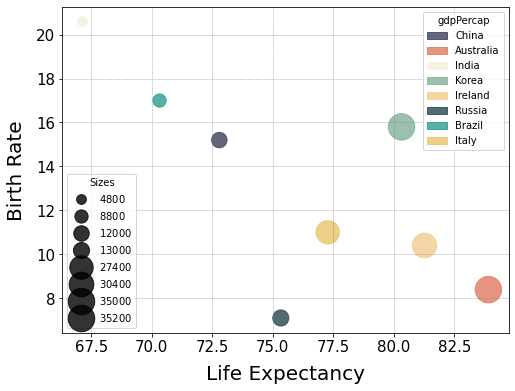

In [7]:
b1 = Bubble()
"""Bubble chart with each bubble name and sizes 

This function will convert the user's incoming data set into DataFrame and then draw
the Bubble Chart using Matplotlib. The bubble chart can show x, y, the size of bubbles and the names of bubbles.

To use this function, you need a dataset with four variables columns. The four variables are x_col_name,
y_col_name, bubble_col and bubble_name. The bubble_col is the column decide bubble sizes and bubble_name 
is will show each bubble name in the legend lables.

In our example, The x_col_name is life_Expectancy, The y_col_name is Birth Rate, The bubble_col is GDP and
bubble_name is country Name. 

Args:
file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
x_col_name: The X column name
bubble_col : The bubble values column
x_label: x axis label
y_label: y axis label
bubble_name: The column of each bubble name, it will show each bubble name in legend lables
legend title: customize legend lables title
plot_title: The title of the plot
output_name : output file name

"""
b1.bubble_plot(
    file='bubble_gdp.xlsx',
    x_col_name='Life Expectancy',
    y_col_name='Birth Rate',
    bubble_col='GDP',
    x_label='Life Expectancy',
    y_label='Birth Rate',
    bubble_name='Name',
    legend_title='gdpPercap',
    output_name='gdp.jpg',
    bubble_scale=50)


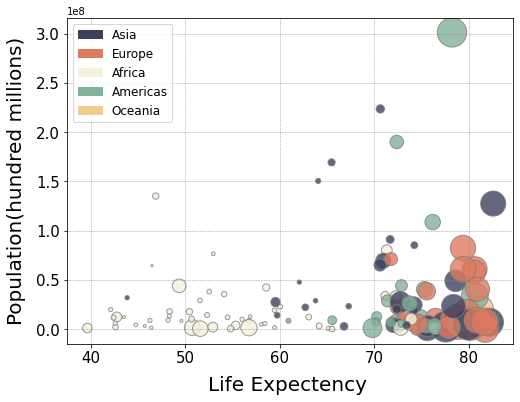

In [5]:
b3 = Bubble()
"""Bubble chart with different category 

This function will convert the user's incoming data set into DataFrame and then draw
the Bubble Chart using Matplotlib. The bubble chart can show x, y, the size of bubbles and the bubble category.
Bubble category is used for when the dataset have a column with multiple type. For example, in our example
continent is a good category. It have Asia, Europe, Africa, Oceania and Americas. Each category will have differnt
bubble colors and also legend for different category.

In the example, x_col_name is life_Exp, y_col_name is population, bubble_col is gdp and the category column is 
continent. 

Args:
    file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
    x_col_name: The X column name
    y_col_name: The Y column name
    bubble_col : The bubble values column
    category_col: The category column of bubble
    x_label: x axis label
    y_label: y axis label
    legend title: customize legend lables title
    plot_title: The title of the plot
    output_name : output file name

"""

b3.bubble_category(
    file='gdp_continent.csv',
    x_col_name='lifeExp',
    y_col_name='pop',
    bubble_col='gdpPercap',
    category_col='continent',
    x_label='Life Expectency ',
    y_label='Population(hundred millions)',
    output_name='gdp_continent.jpg')


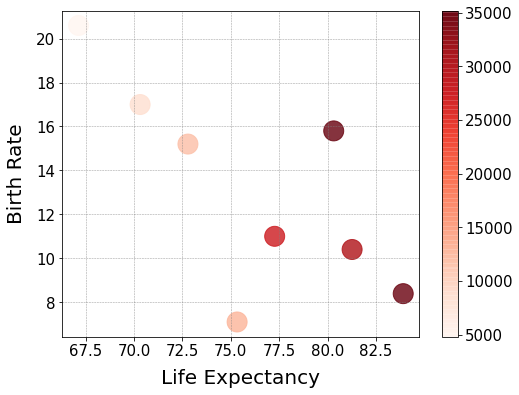

In [6]:
b4 = Bubble()
"""Bubble chart with colormap

This function will convert the user's incoming data set into DataFrame and then draw
the Bubble Chart using Matplotlib. The bubble chart can show x, y and bubbles colormap.

In this bubble chart, the bubble size are fixed. The bubble_col values will decide the The depth
of color of the bubbles. The colormap legend will place at the right hand side of the plot.

Args:
    file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
    x_col_name: The X column name
    y_col_name: The Y column name
    bubble_col : The bubble values column
    x_label: x axis label
    y_label: y axis label
    plot_title: The title of the plot
    output_name : output file name

"""
b4.bubble_colormap(
    file='bubble_gdp.xlsx',
    x_col_name='Life Expectancy',
    y_col_name='Birth Rate',
    bubble_col='GDP',
    x_label='Life Expectancy',
    y_label='Birth Rate',
    legend_label='Name',
    legend_title='gdpPercap',
    output_name='gdp.jpg')
